In [7]:
from operator import add
import numpy as np
def MFScore(X,idx):
    MultiFuncScore=[0] * 100
    T=0.25
    for i in range(0,7):

        D=X[i]
        D[D<T]=0
        D[D>T]=1
        M=np.sum(D,axis=1)
        M[M>1]=1
        if i==idx:
            M=[1] * 100
        #element-wise adding up lists
        MultiFuncScore=list( map(add, MultiFuncScore, M) )
    return MultiFuncScore
taskname='EMOTION'    
idx=0
D1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/Overlap/'+taskname+'_D1.npy')
Score=MFScore(D1,idx)
print(Score)

[7.0, 7.0, 7.0, 7.0, 6.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 4.0, 5.0, 4.0, 7.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 4.0, 6.0, 3.0, 4.0, 7.0, 7.0, 6.0, 6.0, 3.0, 6.0, 6.0, 4.0, 5.0, 4.0, 7.0, 7.0, 5.0, 6.0, 6.0, 1.0, 7.0, 6.0, 6.0, 4.0, 5.0, 3.0, 7.0, 5.0, 7.0, 6.0, 5.0, 7.0, 5.0, 6.0, 7.0, 6.0, 2.0, 6.0, 7.0, 6.0, 5.0, 6.0, 5.0, 2.0, 3.0, 3.0, 5.0, 4.0, 6.0, 6.0, 7.0, 5.0, 4.0, 7.0, 2.0, 6.0, 5.0, 5.0, 6.0, 7.0, 7.0, 7.0, 4.0, 1.0, 6.0, 2.0, 6.0, 7.0, 7.0, 5.0, 2.0, 6.0, 7.0, 5.0, 7.0]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
X=list(range(0,100))
def plot(Score,taskname,file):
    plt.figure(figsize=(30, 3))
    plt.ylim(0, 7)
    sns.set(style="whitegrid")
    sns_plot=sns.barplot(X,Score,color="r")
    sns_plot.set(xlabel='First Layer Maps of '+taskname+ 'task', ylabel='Multifunction Socre"')
    plt.savefig(file)
#     return sns_plot

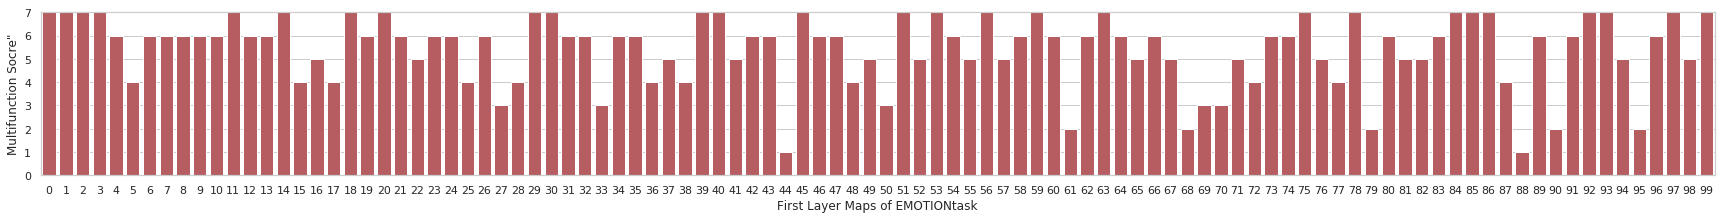

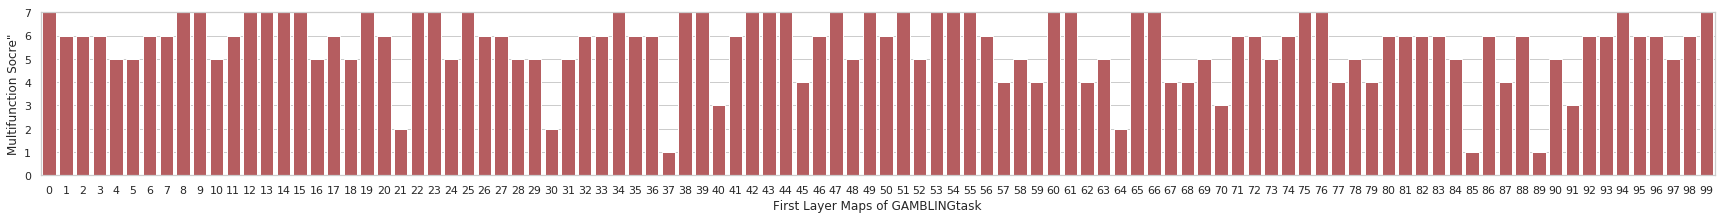

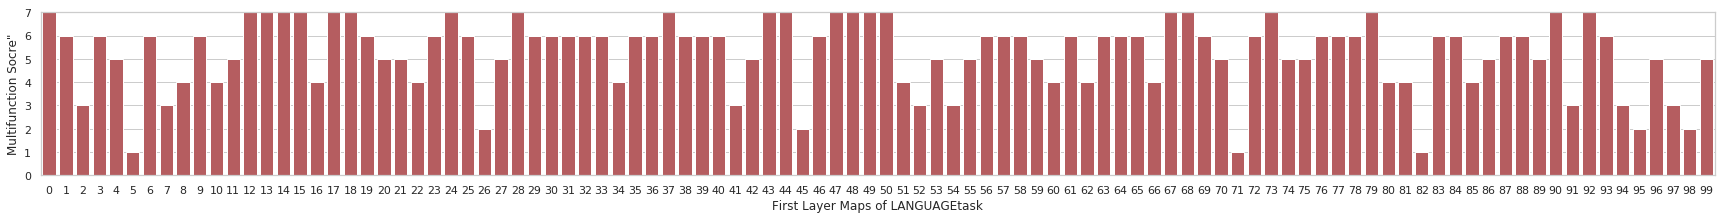

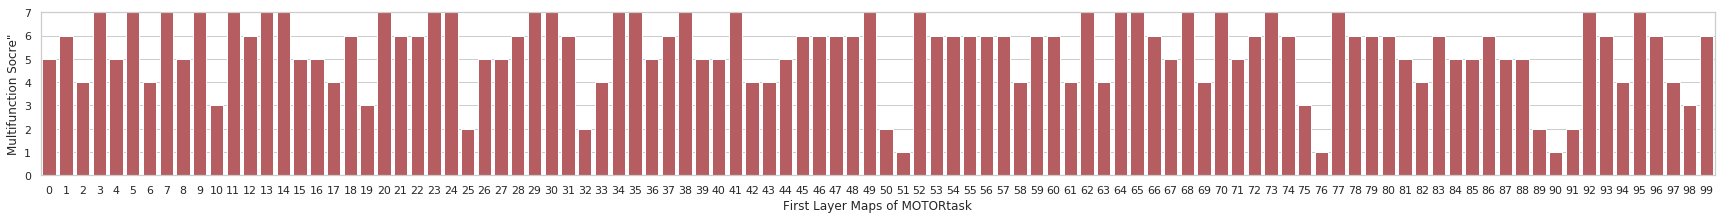

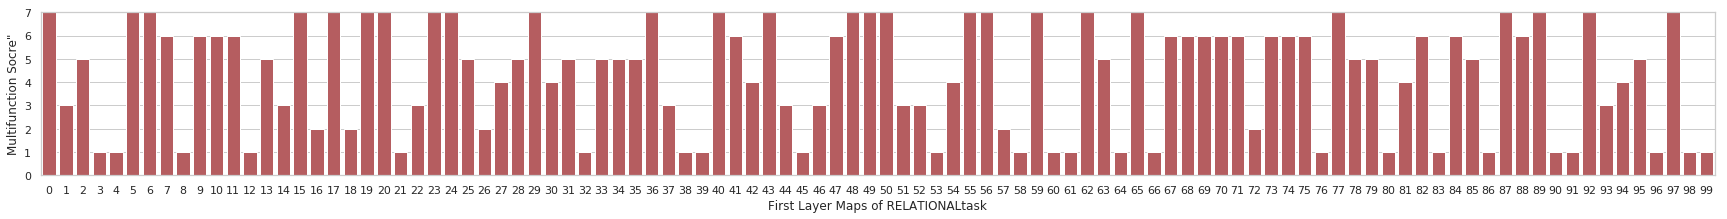

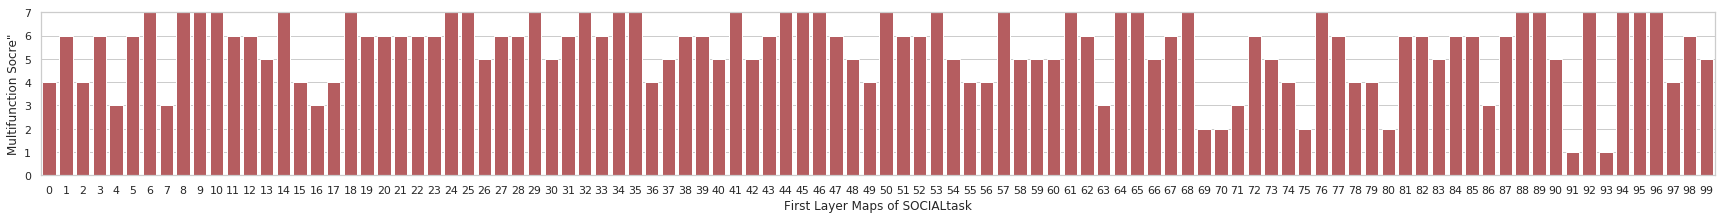

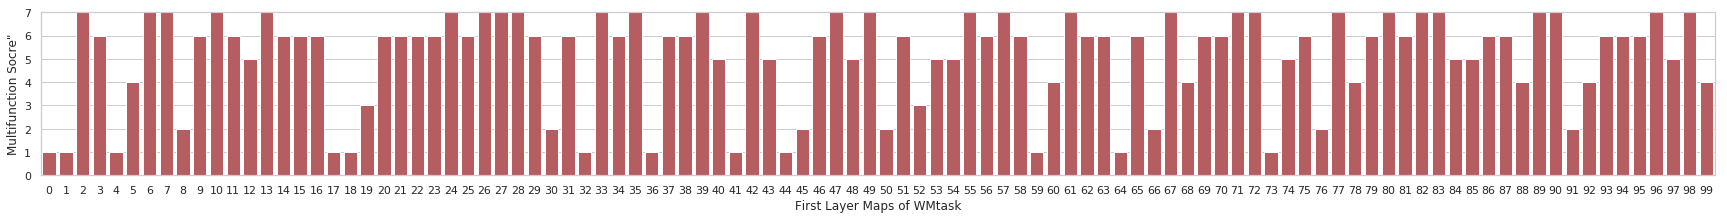

In [9]:

tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/Overlap/'+taskname+'_D1.npy')
    Score=MFScore(D1,idx)
    plot(Score,taskname,'/home/share/TmpData/Qinglin/HCP_Group_DBN/MultiFunction/'+taskname+'_D1.png')


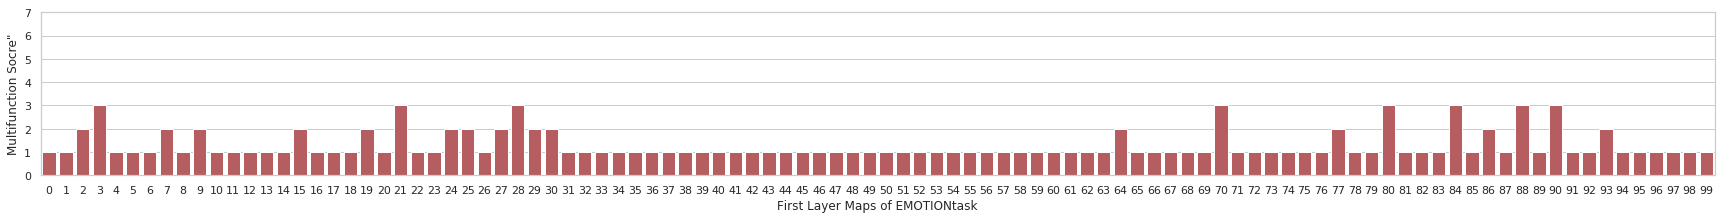

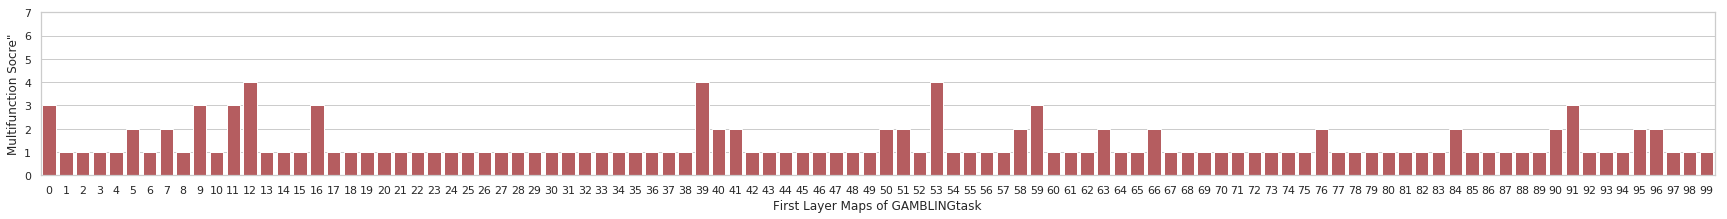

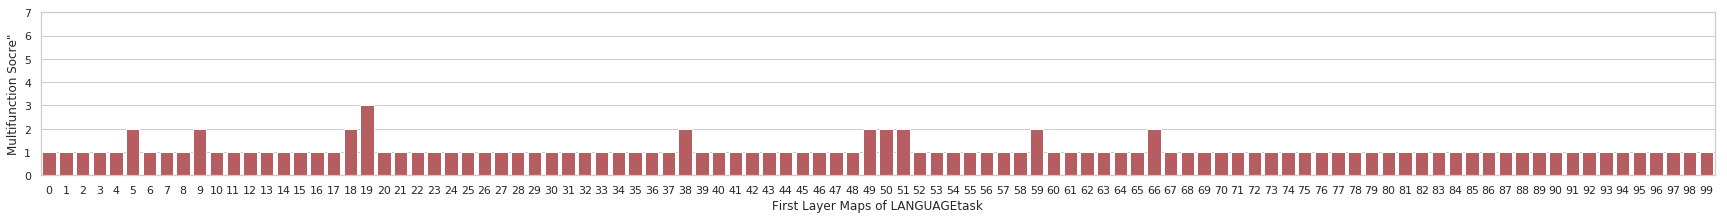

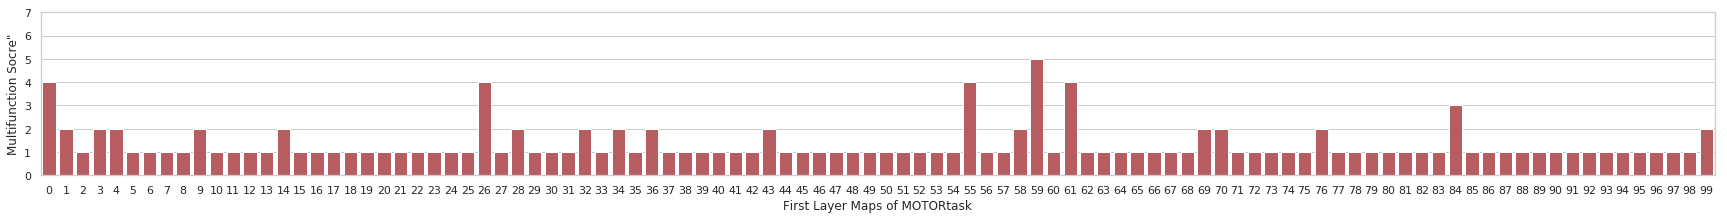

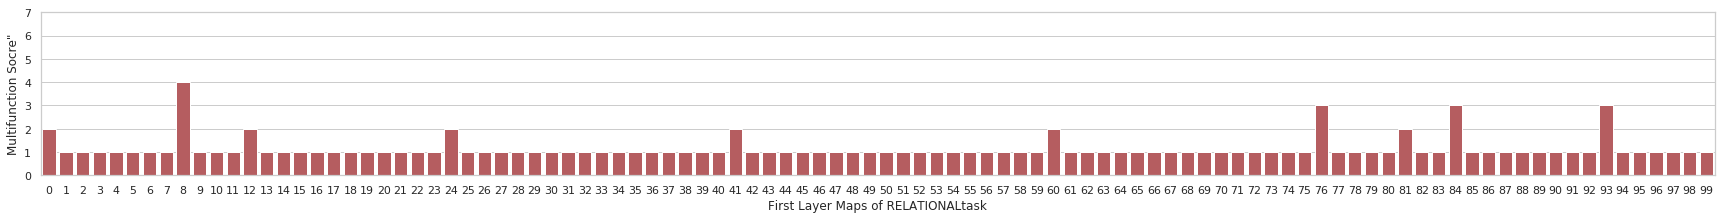

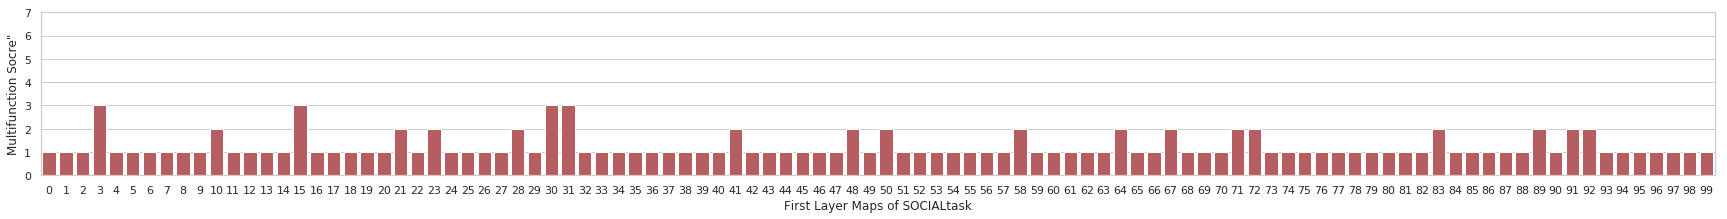

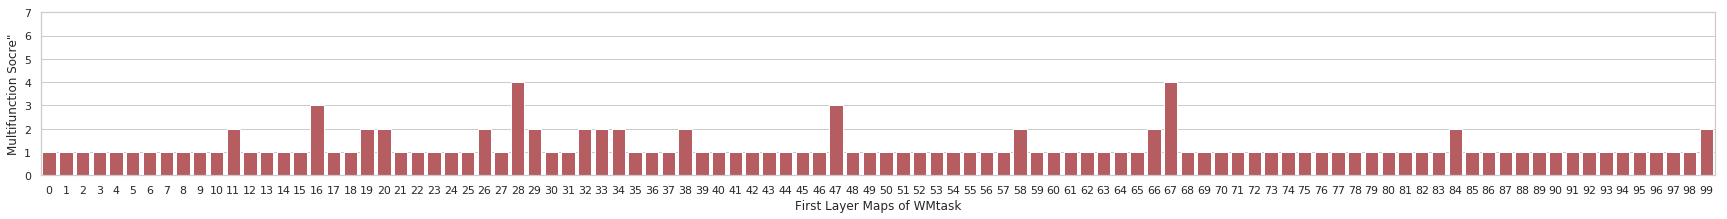

In [10]:
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/Overlap/'+taskname+'_D2.npy')
    Score=MFScore(D2,idx)
    plot(Score,taskname,'/home/share/TmpData/Qinglin/HCP_Group_DBN/MultiFunction/'+taskname+'_D2.png')

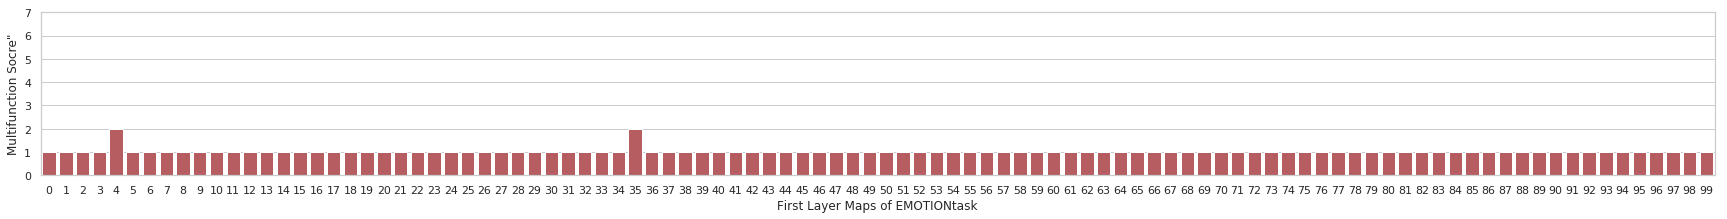

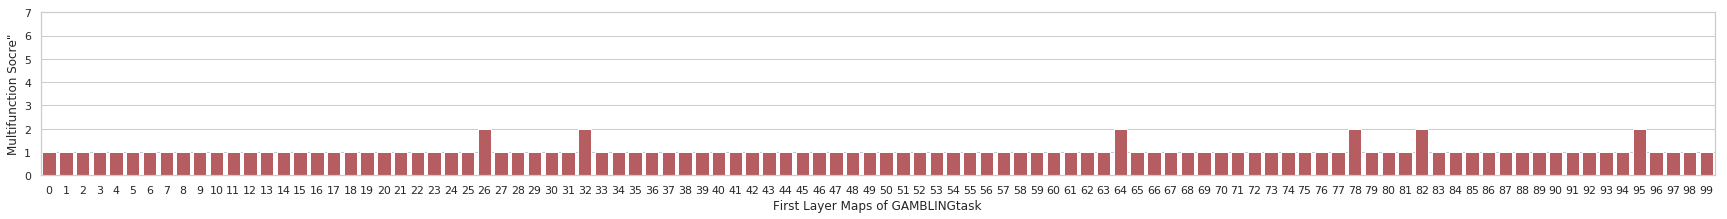

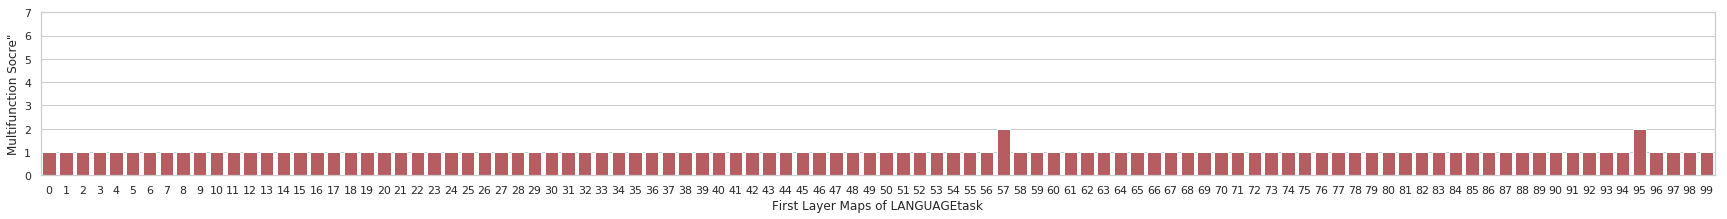

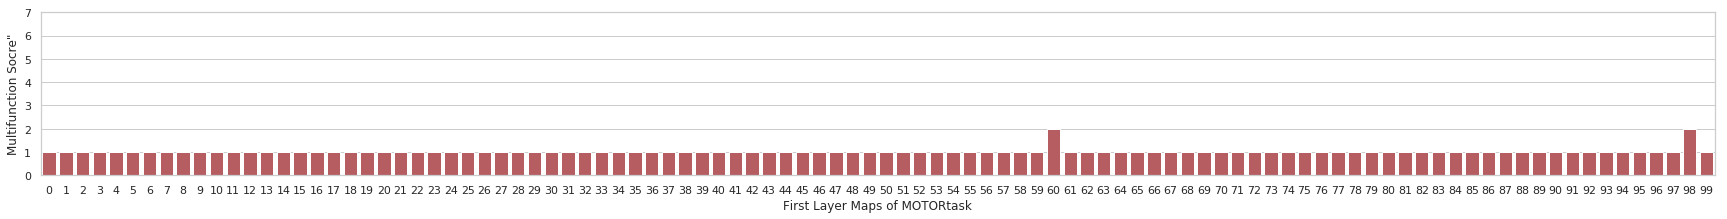

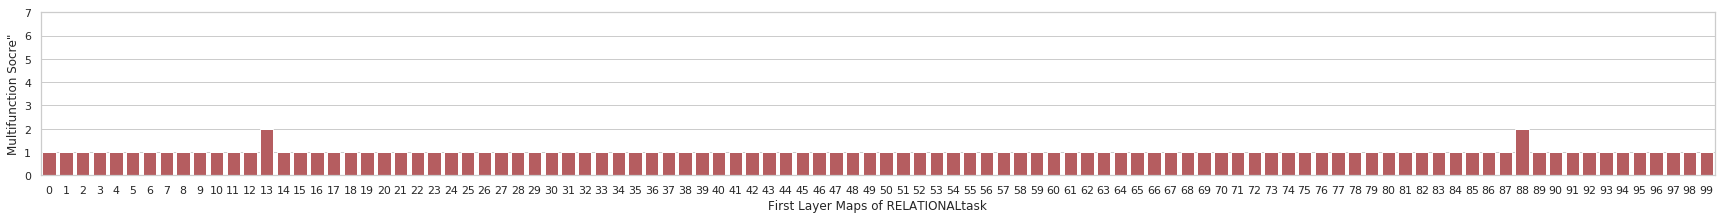

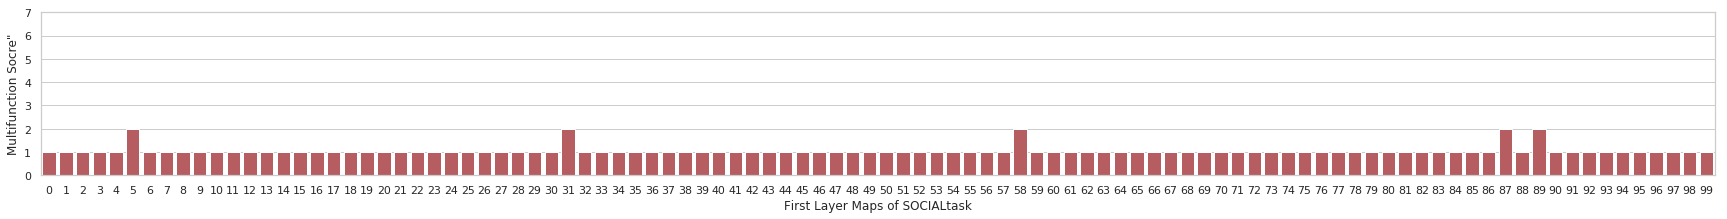

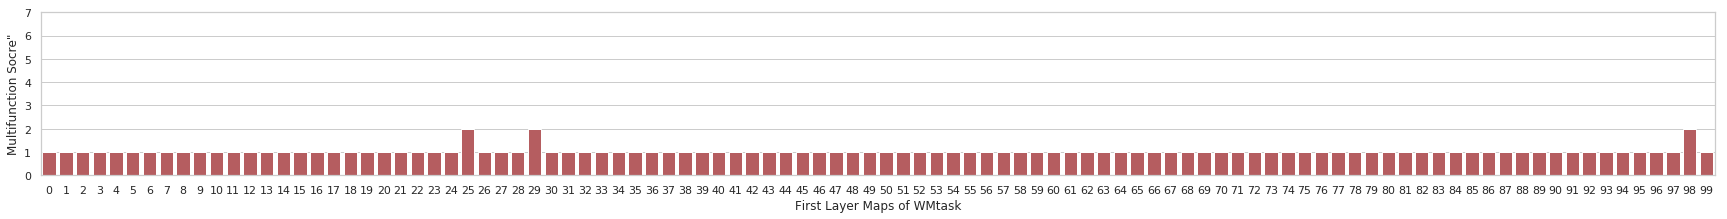

In [11]:
tasks=['EMOTION','GAMBLING','LANGUAGE','MOTOR','RELATIONAL','SOCIAL','WM']
for idx,taskname in enumerate(tasks):
    D3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/Overlap/'+taskname+'_D3.npy')
    Score=MFScore(D3,idx)
    plot(Score,taskname,'/home/share/TmpData/Qinglin/HCP_Group_DBN/MultiFunction/'+taskname+'_D3.png')

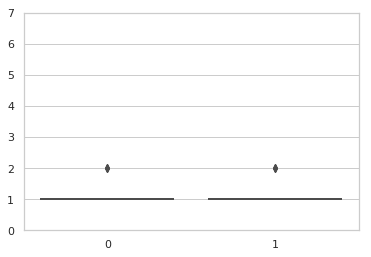

In [21]:
plt.figure()
plt.ylim(0, 7)
sns.boxplot(data=[np.asarray(Score),np.asarray(Score)],notch=1)